In [1]:
# Importar bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Paso 1: cargar y guardar archivo csv en una variable
data = pd.read_csv('https://raw.githubusercontent.com/armandoordonez/eda_couse/main/data/prediccion_prestamo_train.csv')

In [3]:
# Paso 2: se realiza un Análisis exploratorio básico
print("Información del dataset:")
print(data.info())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       614 non-null    object 
 1   Genero                   601 non-null    object 
 2   Married                  611 non-null    object 
 3   dependientes             599 non-null    object 
 4    educacion               614 non-null    object 
 5    autoempleado            582 non-null    object 
 6    ingresos_solicitante    614 non-null    int64  
 7    ingresos_cosolicitante  614 non-null    float64
 8    monto_prestamo          592 non-null    float64
 9    plazo_prestamo          600 non-null    float64
 10   historial_crediticio    564 non-null    float64
 11   area_propiedad          614 non-null    object 
 12   estado_prestamo         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ 

In [4]:
# Paso 2: Muestra de estadísticas descriptivas básicas
print("\nEstadísticas descriptivas: ")
data.describe()


Estadísticas descriptivas: 


,ingresos_solicitante,ingresos_cosolicitante,monto_prestamo,plazo_prestamo,historial_crediticio
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
# Paso 3: se procede a eliminar datos NaN y se verifica de nuevo los datos
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       480 non-null    object 
 1   Genero                   480 non-null    object 
 2   Married                  480 non-null    object 
 3   dependientes             480 non-null    object 
 4    educacion               480 non-null    object 
 5    autoempleado            480 non-null    object 
 6    ingresos_solicitante    480 non-null    int64  
 7    ingresos_cosolicitante  480 non-null    float64
 8    monto_prestamo          480 non-null    float64
 9    plazo_prestamo          480 non-null    float64
 10   historial_crediticio    480 non-null    float64
 11   area_propiedad          480 non-null    object 
 12   estado_prestamo         480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [6]:
# Visualización de las primeras filas del conjunto de datos
print("\nPrimeras filas del dataset :")
data.head()


Primeras filas del dataset :


,ID,Genero,Married,dependientes,educacion,autoempleado,ingresos_solicitante,ingresos_cosolicitante,monto_prestamo,plazo_prestamo,historial_crediticio,area_propiedad,estado_prestamo
1,LP001003,Hombre,Si,1,Graduado,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Hombre,Si,0,Graduado,Si,3000,0.0,66.0,360.0,1.0,Urbano,Y
3,LP001006,Hombre,Si,0,Not Graduado,No,2583,2358.0,120.0,360.0,1.0,Urbano,Y
4,LP001008,Hombre,No,0,Graduado,No,6000,0.0,141.0,360.0,1.0,Urbano,Y
5,LP001011,Hombre,Si,2,Graduado,Si,5417,4196.0,267.0,360.0,1.0,Urbano,Y


<ipython-input-25-a7fc3eedde77>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = data.corr()


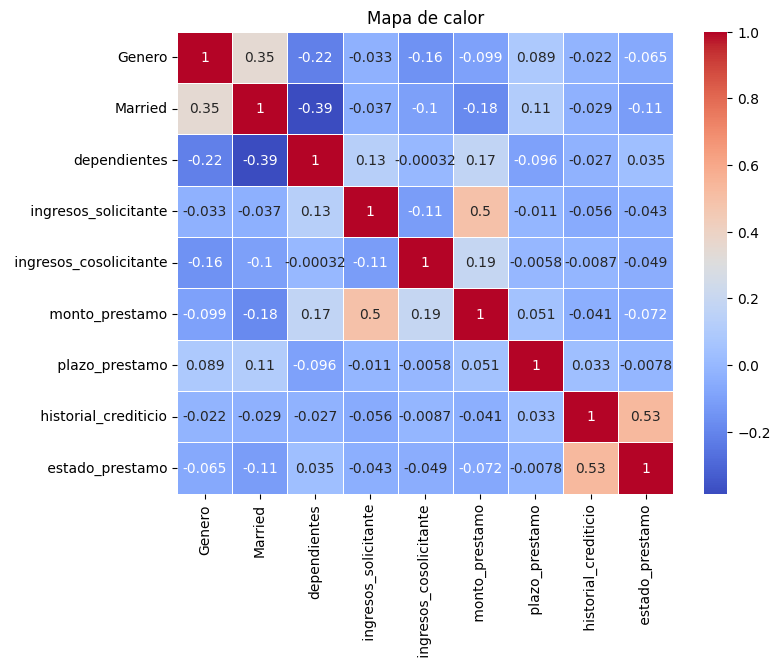

In [25]:
matriz_correlacion = data.corr()

# Crear un mapa de calor
plt.figure(figsize=(8, 6))  # Tamaño del mapa de calor
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Mapa de calor')
plt.show()

In [7]:
# Codificar nuevas variables, con el objetivo de mejorar el accuracy del modelo
data[' estado_prestamo'] = data[' estado_prestamo'].replace({"Y": 1 , "N": 0})
data['Genero'] = data['Genero'].replace({"Hombre": 0, "FeHombre": 1})
data['dependientes'] = data['dependientes'].replace({"0": 0, "1":1, "2":2, "3+":3})
data['Married'] = data['Married'].replace({"Si":0, "No":1})

# Convertir los datos reemplazados a tipo int
data[' estado_prestamo'] = data[' estado_prestamo'].astype(int)

In [8]:
# Paso 4: Dividir el conjunto de datos en características (X) y etiquetas (y)
#X = data[[" ingresos_solicitante", " ingresos_cosolicitante", " monto_prestamo","Genero","dependientes","Married"]]
#y = data[' estado_prestamo']
#AGREGAR OTRAS VARIABLES, PARA ENTRENAR EL MODELO Y SUBIR EL NOTEBOOK A GITHUB EN LA RAMA 2024-1

In [24]:
#Se realizan pruebas con diferentes variables, para visualizar cuales afectan significativamente el accuracy del modelo.
#X = data[["Genero","dependientes","Married"," historial_crediticio"]]
#y = data[' estado_prestamo']

In [26]:
#En la matriz de correlación generada anteriormente, se puede apreciar que el historial crediticio, tiene una correlacion cercana a 1, esto podria mejorar el accuracy del modelo
X = data[[" historial_crediticio"]]
y = data[' estado_prestamo']

In [27]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 5: Entrenar un modelo de clasificacion (se hace uso de Random Forest)
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

RandomForestClassifier(random_state=42)


Precisión del modelo:  0.82


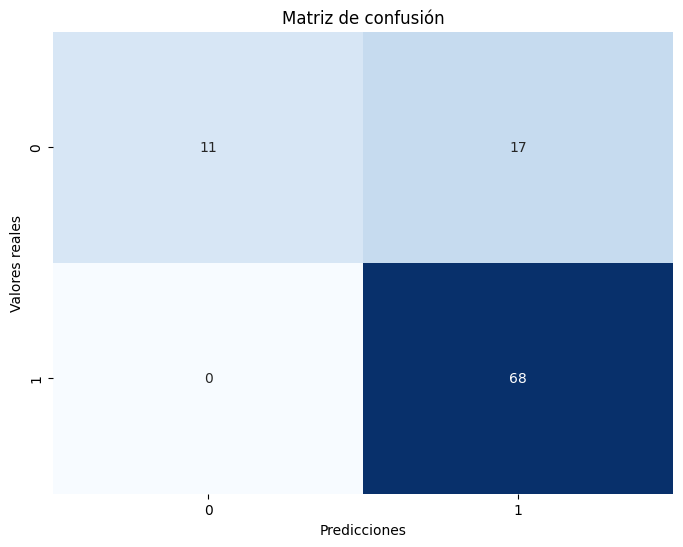


Informe de clasificación: 
              precision    recall  f1-score   support

           0       1.00      0.39      0.56        28
           1       0.80      1.00      0.89        68

    accuracy                           0.82        96
   macro avg       0.90      0.70      0.73        96
weighted avg       0.86      0.82      0.79        96



In [28]:
# Paso 6: se realiza la evaluación del modelo

y_pred = modelo.predict(x_test)

# Se calcula la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo:  {precision:.2f}")

# Se visualiza la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión')
plt.show()


# Se realiza y visualiza informe de clasificación
informe_clasificacion = classification_report(y_test, y_pred)
print("\nInforme de clasificación: ")
print(informe_clasificacion)

In [13]:
# Paso 7: se realiza el guardado del modelo entrenado en pkl

import pickle

with open('modelo_prestamo.pkl', 'wb') as archivo_salida:
  pickle.dump(modelo, archivo_salida)


# Paso 8 Carga del modelo entrenado

with open('modelo_prestamo.pkl' ,'rb') as archivo_entrada:
  modelo_cargado = pickle.load(archivo_entrada)